# Milestone 1 (Classification)

**Objectives**

The first goal for this project is: to predict if a person will default or not.  Afterwards, the second goal for this project is: to explain what are the causes or reasons that make a person default or not. Finally, a third goal for this project is to segment those indivuals with higher and lower tendecies to default.  


**Data description**


The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant



**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')


pd.options.display.float_format = "{:,.2f}".format
pd.options.display.precision = 3


**Read the dataset**

In [2]:
hm = pd.read_csv('/Volumes/GoogleDrive/My Drive/MIT/ADSP/Supervised Learning -Classification/HMEQ.csv')

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

**Print the first and last 5 rows of the dataset**

In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,"25,860.00","39,025.00",HomeImp,Other,10.50,0.00,0.00,94.37,1.00,9.00,NaN
1,1,1300,"70,053.00","68,400.00",HomeImp,Other,7.00,0.00,2.00,121.83,0.00,14.00,NaN
2,1,1500,"13,500.00","16,700.00",HomeImp,Other,4.00,0.00,0.00,149.47,1.00,10.00,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,"97,800.00","112,000.00",HomeImp,Office,3.00,0.00,0.00,93.33,0.00,14.00,NaN


In [5]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,"57,264.00","90,185.00",DebtCon,Other,16.00,0.00,0.00,221.81,0.00,16.00,36.11
5956,0,89000,"54,576.00","92,937.00",DebtCon,Other,16.00,0.00,0.00,208.69,0.00,15.00,35.86
5957,0,89200,"54,045.00","92,924.00",DebtCon,Other,15.00,0.00,0.00,212.28,0.00,15.00,35.56
5958,0,89800,"50,370.00","91,861.00",DebtCon,Other,14.00,0.00,0.00,213.89,0.00,16.00,34.34
5959,0,89900,"48,811.00","88,934.00",DebtCon,Other,15.00,0.00,0.00,219.60,0.00,16.00,34.57


**Understand the shape of the dataset**

In [25]:
data.shape

(5960, 13)

**Observations**

There are 5960 observations and 13 columns.

**Check the data types of the columns**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations**

We have two categorical variables (REASON, JOB) and all other are integers or floats, that is, numerical.

**Checking for missing values**

In [27]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [28]:
data.isnull().sum()*100/len(data)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Observations**

We found that DEROG and DEBTINC are the variables that have the highest percentage of missing values compared to the rest.

I think that a acceptable threshold of missing values in each variables would be 25%. That is, if the percentage of the missing values for each variable exceeds 25% of the number of observations in that variable, I would certainly not consider it in further analysis, due to the lack of information, it has intrisically which migh lead to wrong and biased conclusions. 

**Convert the data types**

In [6]:
#Target variable to categorical
data['BAD'] = data['BAD'].astype('category')

In [7]:
#Object variables to categorical
data['REASON'] = data['REASON'].astype('category')
data['JOB'] = data['JOB'].astype('category')

In [8]:
#Checking the data types after transformations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Analyze Summary Statistics of the dataset**

In [9]:
#Creating numerical columns
num_cols=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

#Creating categorical variables 
cat_cols= ['BAD', 'REASON', 'JOB']

In [41]:
#Summary statistics for numerical data
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,"5,960.00","18,607.97","11,207.48","1,100.00","11,100.00","16,300.00","23,300.00","89,900.00"
MORTDUE,"5,442.00","73,760.82","44,457.61","2,063.00","46,276.00","65,019.00","91,488.00","399,550.00"
VALUE,"5,848.00","101,776.05","57,385.78","8,000.00","66,075.50","89,235.50","119,824.25","855,909.00"
YOJ,"5,445.00",8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,"5,252.00",0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,"5,380.00",0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,"5,652.00",179.77,85.81,0.00,115.12,173.47,231.56,"1,168.23"
NINQ,"5,450.00",1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,"5,738.00",21.30,10.14,0.00,15.00,20.00,26.00,71.00
DEBTINC,"4,693.00",33.78,8.60,0.52,29.14,34.82,39.00,203.31


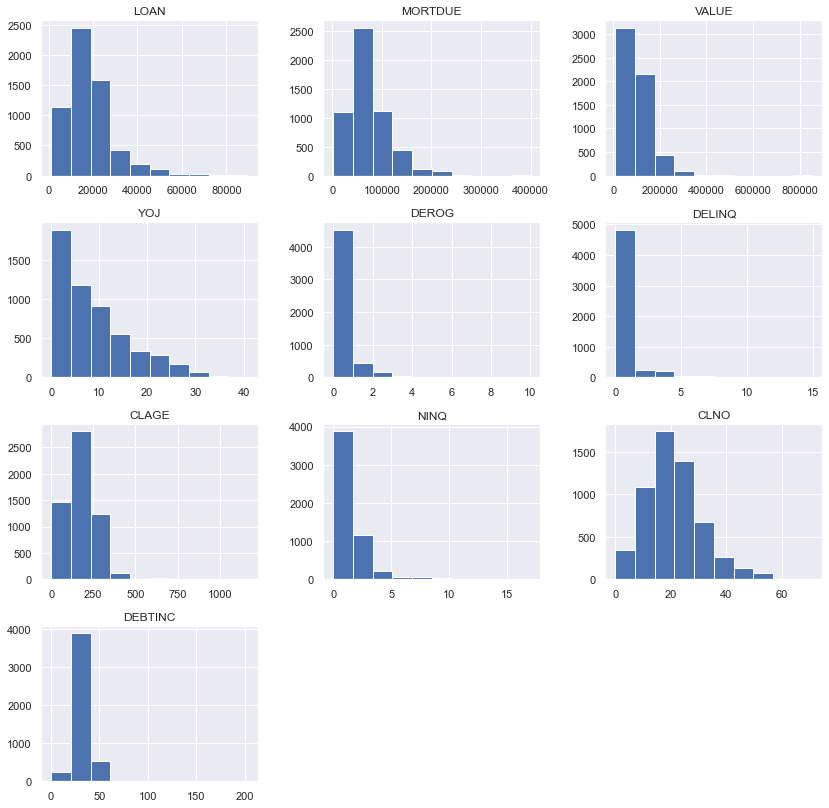

In [42]:
#creating histograms
data[num_cols].hist(figsize=(14,14))
plt.show()

**Observations**

Average loan is about 18,607 USD, and from the histogram we can see that it is rightly skewed, 
that is, a majority of people get a loan no bigger than 40,000 USD.

The amount due on the existing mortgage in average is 73,760 USD, an also is rightly skewed, 
which mans, that it is unlikely to see amounts past the 100,000 USD.

The average value of the property in average is 101,776, and the distribution is very similar of the
amount due on the existing mortgage, intuitively one would think that these variables are correlated.

The average years at job for the individuals sampled in this data set is in average almost 9 years, 
and it also rightly skewed.

The number of major derogatory reports is relatively low, in average is .25 and for the histogram,
we can see that the majority of the individuals in this sample has none.

Also, the number of delinquent credit lines is relatively low, on average .45 and it is rightly skewed.

In average the oldest credit line is 179 months, and judging for the maximum number it seems,
that this variable might have some outliers.

The number of recent inquiries on average is 1.18 and it also appears to have some outliers.

The number of existing credit lines, follows a normal distribution, judging from the histogram, 
but tends to be skewed towards the right. On average is 21.30.

Debt to income is the variable with the most number of missing values, as the histogram can reveal. 
With this in mind the average debt to income ratio is almost 34.


In [39]:
#Summary statistics for categorical data
data[cat_cols].describe(include = 'category').T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Observations**

We can see that for the categorical variables we have 2 catgeories for BAD and REASON, and 6 for JOB. 
Which is the type of job that loan applicants have.

In [45]:
# Checking the count of unique values in each categorical column
data[cat_cols].nunique()

BAD       2
REASON    2
JOB       6
dtype: int64

**Observations**

In my opinion, this is not the best wey to check the summary statistics for the categorical values,
I would propose to run a table of frequencies. To see the precentage for each category in each variable, and 
thus have a full picture of them.

In [47]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*20)

0   0.80
1   0.20
Name: BAD, dtype: float64
********************
DebtCon   0.69
HomeImp   0.31
Name: REASON, dtype: float64
********************
Other     0.42
ProfExe   0.22
Office    0.17
Mgr       0.14
Self      0.03
Sales     0.02
Name: JOB, dtype: float64
********************


**Observations**

The overall percentage of loan default in this sample is 20%. 

The reason for the loan request is 69% home improvement and 31% debt consolidation.

And the highest percetage of job type is "other", with a little bit more of 2/5 of the sample in it. This can be a problem, because a high percentage like this would limit us to draw conclusions on further analysis.


## 1. Univariate Analysis-Numerical Data

In [49]:
#Funnction to visualize boxplots and histograms
def histogram_boxplot(feature, figsize=(9,18), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

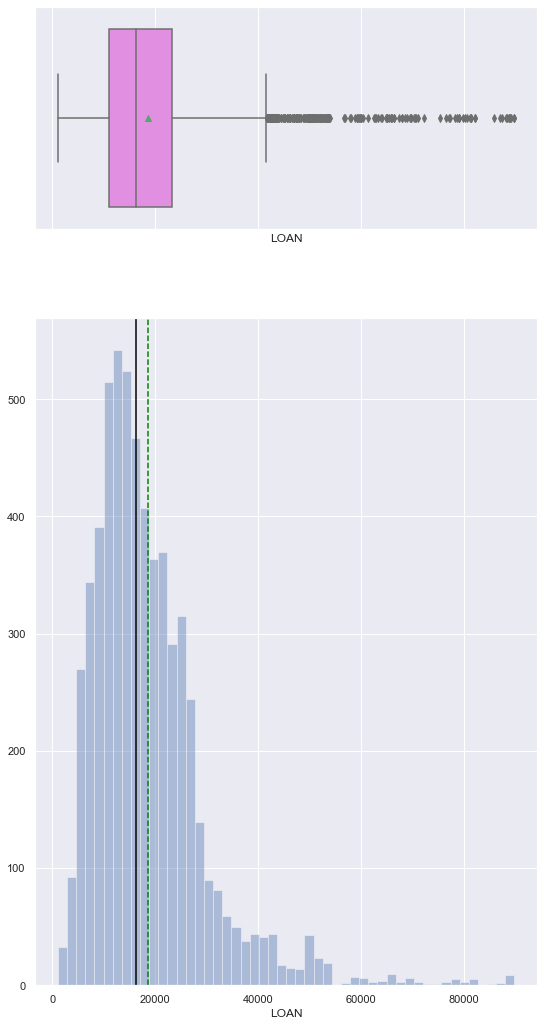

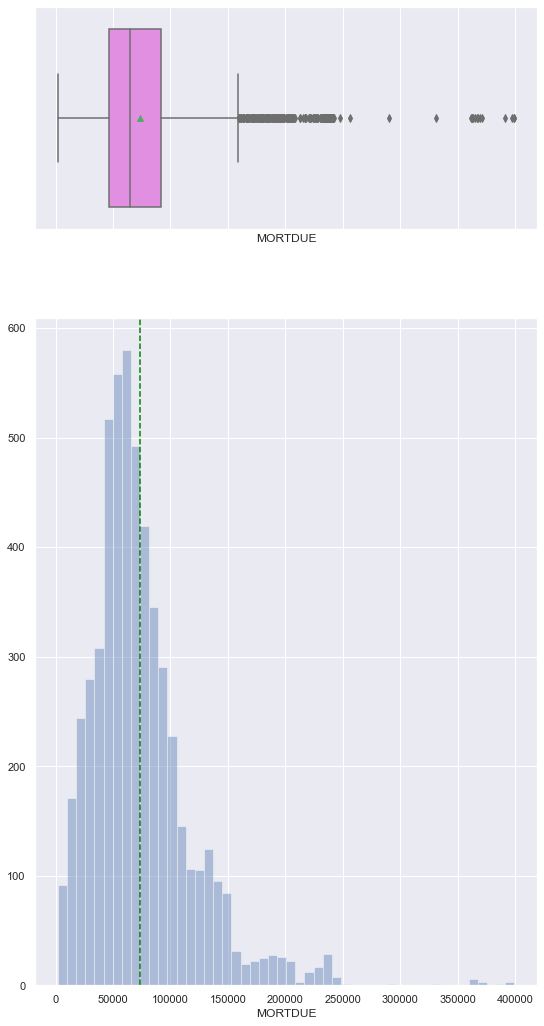

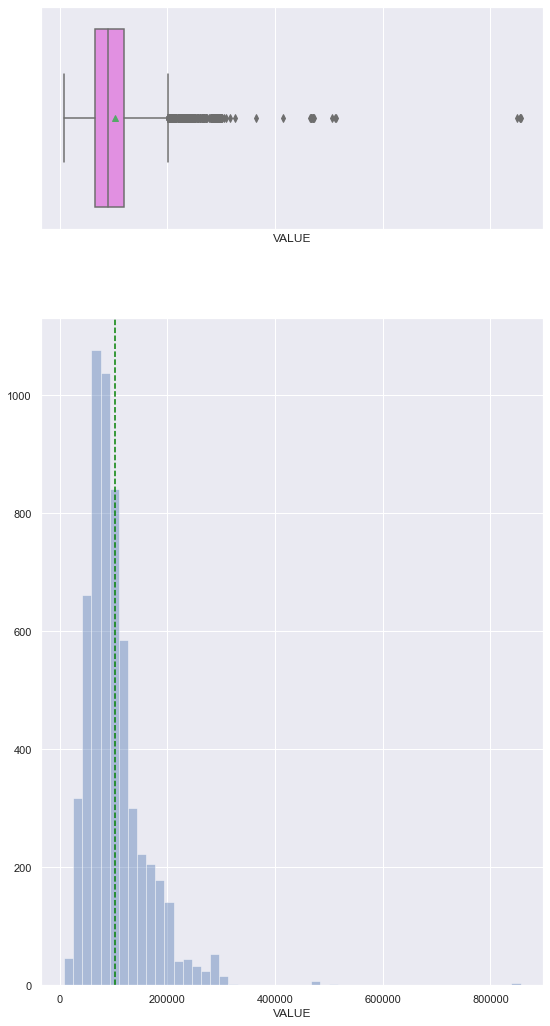

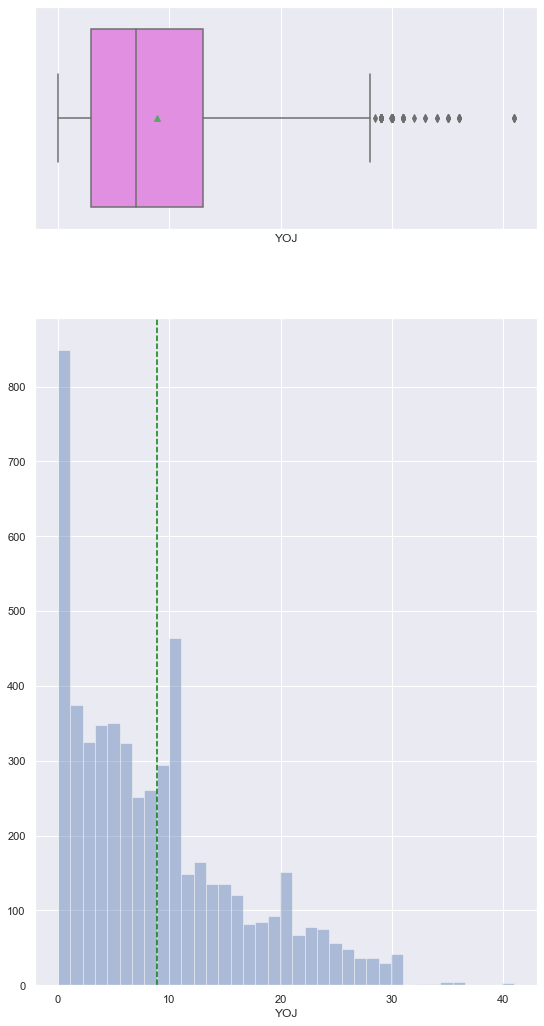

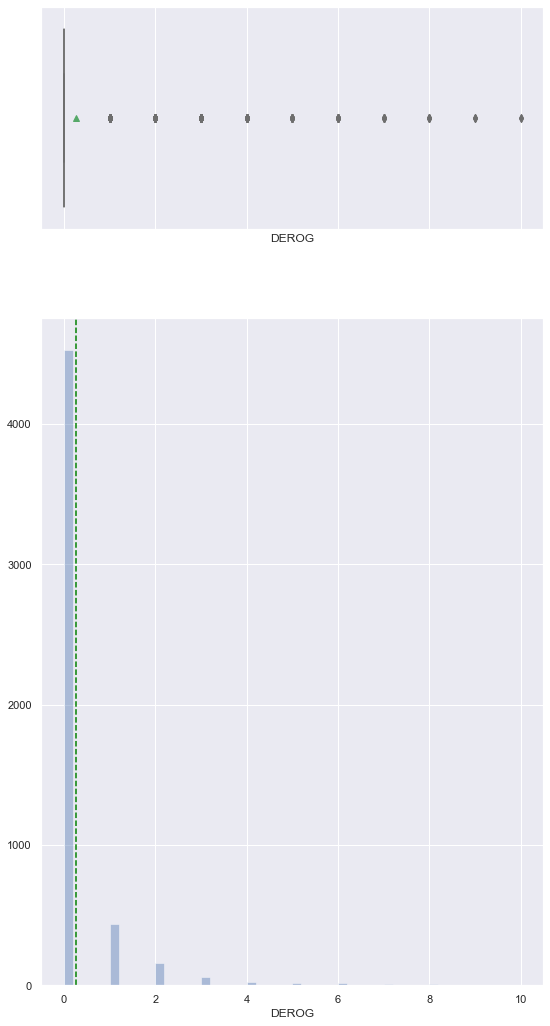

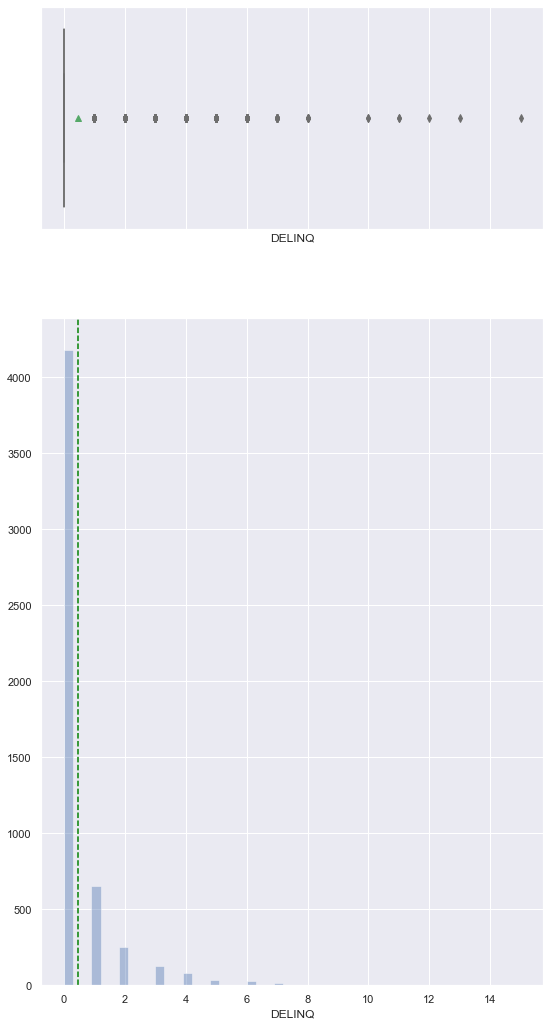

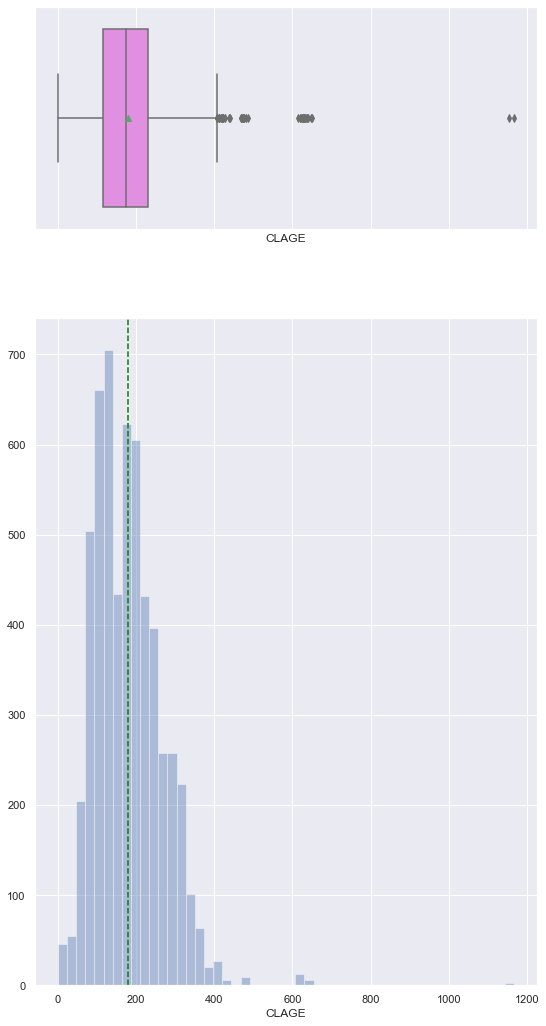

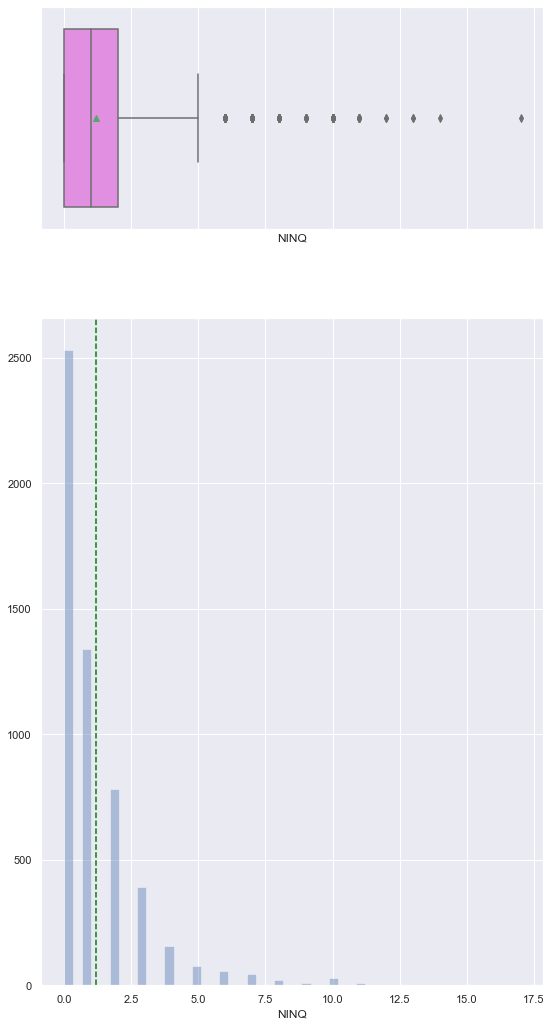

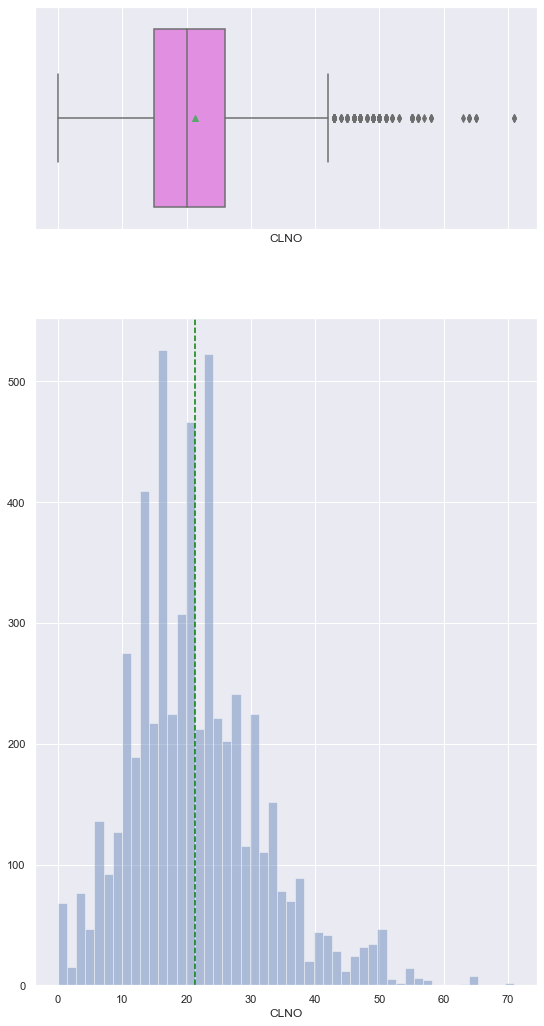

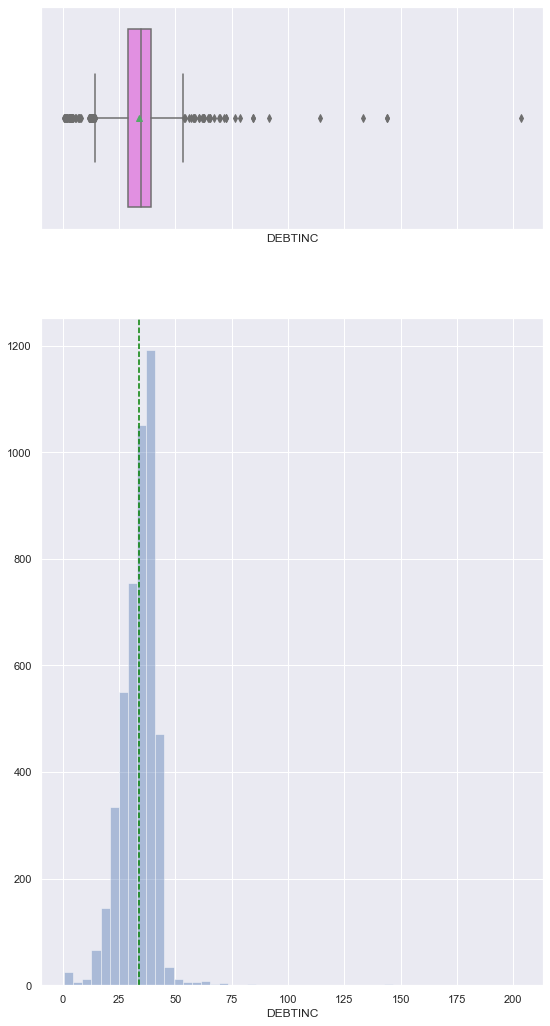

In [50]:
# Build the histogram boxplot for other numerical variables
histogram_boxplot(data['LOAN'])
histogram_boxplot(data['MORTDUE'])
histogram_boxplot(data['VALUE'])
histogram_boxplot(data['YOJ'])
histogram_boxplot(data['DEROG'])
histogram_boxplot(data['DELINQ'])
histogram_boxplot(data['CLAGE'])
histogram_boxplot(data['NINQ'])
histogram_boxplot(data['CLNO'])
histogram_boxplot(data['DEBTINC'])

**Observations**

As a general perspective we can see that almost all the variables in the data set contains outliers,
not that it is uncommon for any given sample, but in our case we can anticipate that this will affect the predictions, 
and the results of the models that we migh develop ahead.


# 2. Univariate Analysis - Categorical Data

In [51]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
   
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 
        
    plt.show() 

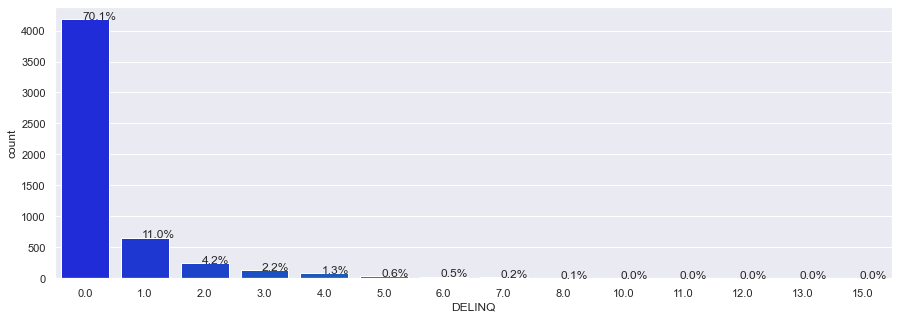

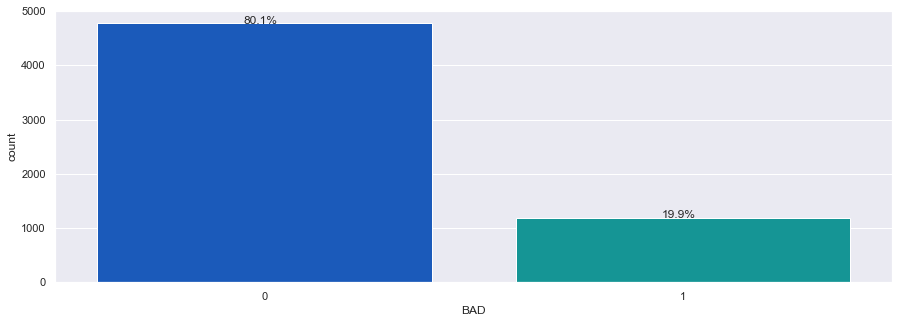

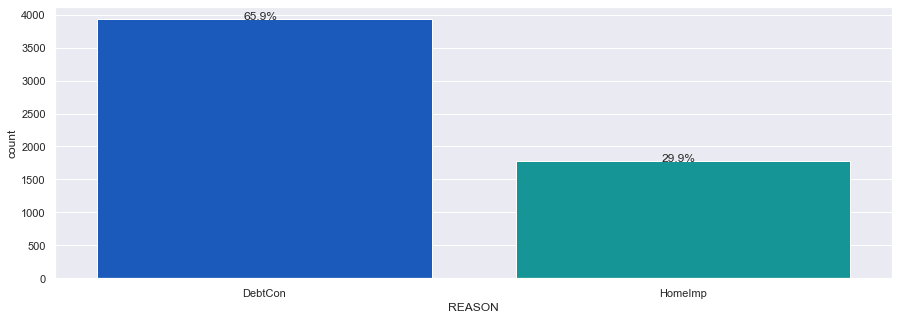

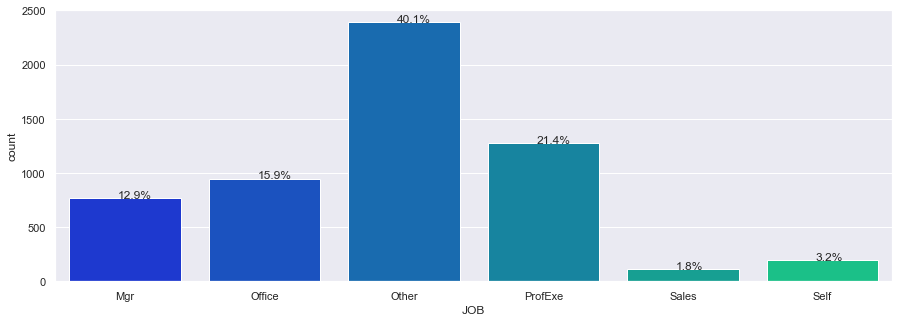

In [52]:
#Build barplot for categorical variables

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Observations**

As noted earlier, from the table of % of the sub categories, we can note that:

The overall percentage of loan default in this sample is 20%. 
The reason for the loan request is 69% home improvement and 31% debt consolidation.
And the highest percetage of job type is "other", with a little bit more of 2/5 of the sample in it. This can be a problem, because a high percentage like this would limit us to draw conclusions on further analysis.

# 3. Bivariate Analysis

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

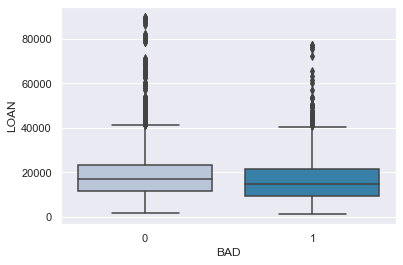

In [53]:
#Boxplot BAD vs continuous variables

sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

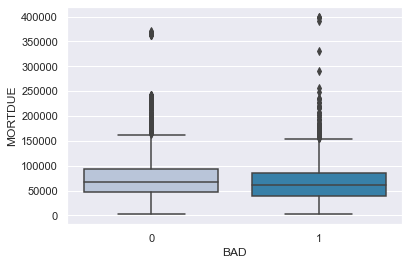

In [54]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

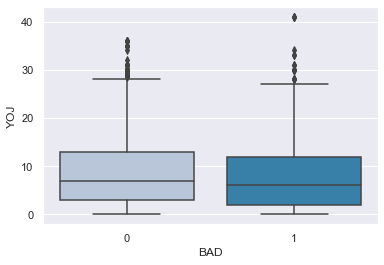

In [55]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

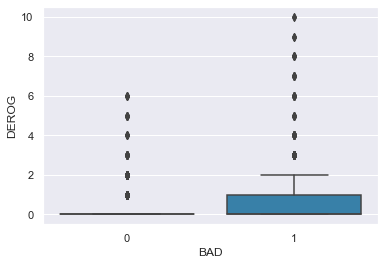

In [56]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

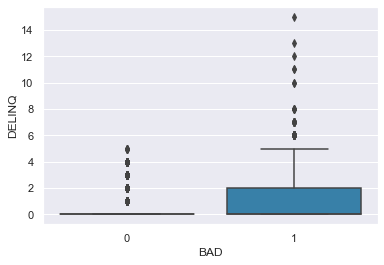

In [57]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

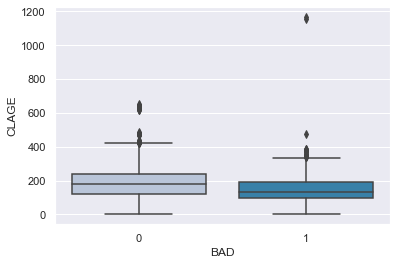

In [58]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

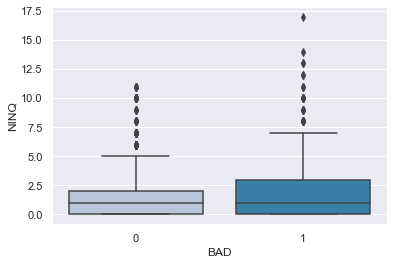

In [59]:
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

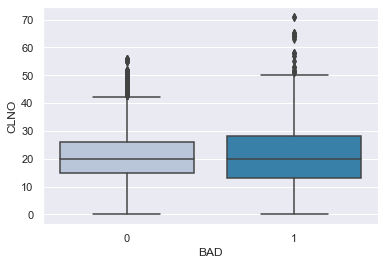

In [60]:
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

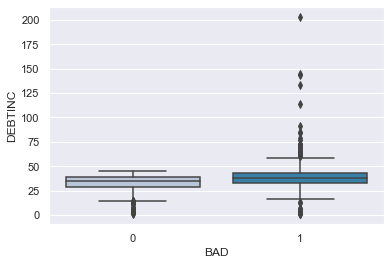

In [61]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

**Observations**

We can see how defaulters have less time in months with the oldest credit line. Also than they have more delinquent credit lines, more derogatory reports. And no visible differences in the other variables.


**Bivariate analysis: Two continuous variables**

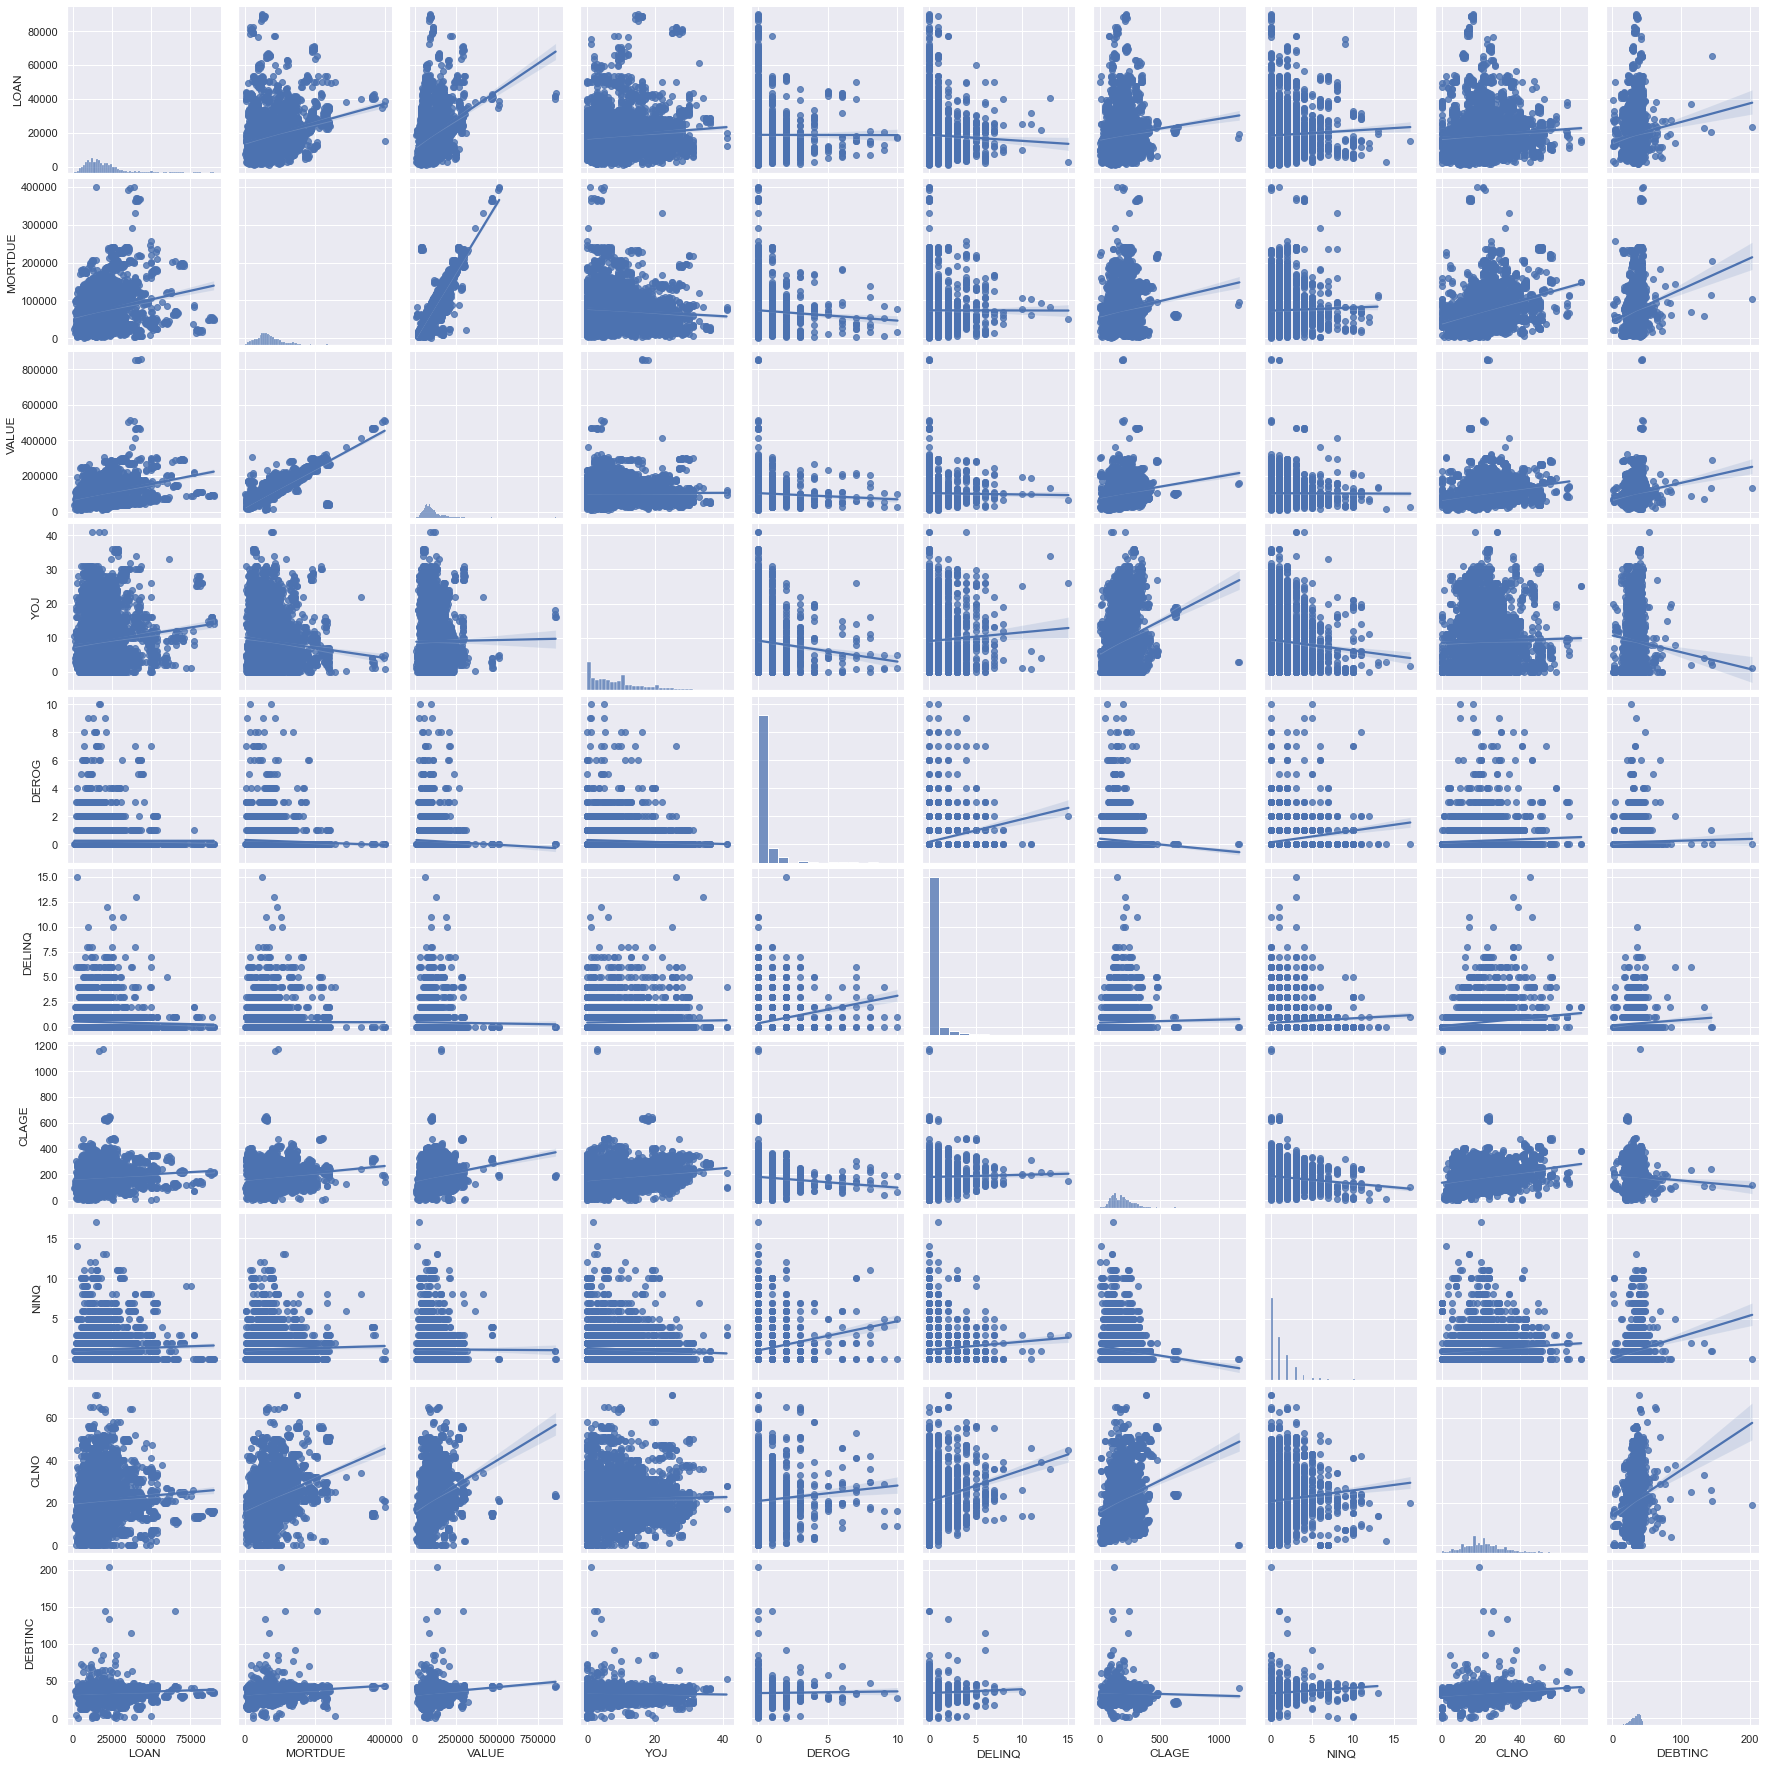

In [63]:
#Here; I created a plot in which we can visually see the relationship with a linear regression line amongst continuous 
#variables.

sns.pairplot(data,kind = "reg" )
plt.show()


**Observations**

From the chart above we can see clearely that there seem to be some relationship among variables, 
but due to the right skewenes of the data, linearity among them is not that clear, at least visibly.
The only variables that appear to have a clear linear relationship are: VALUE and MORTDUE.


**Plot stacked bar for BAD and categorical variables**

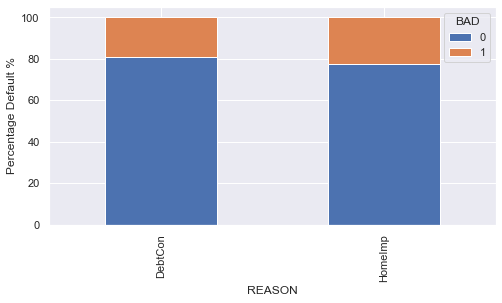

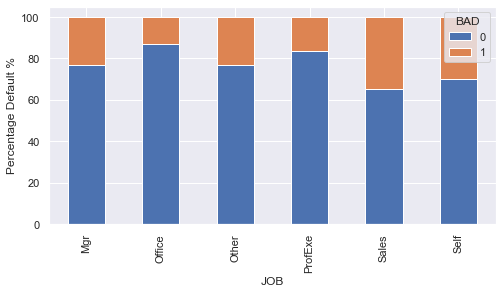

In [65]:
for i in cat_cols:
    if i!='BAD':
        (pd.crosstab(data[i],data['BAD'],
                     normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Default %')

**Observations**

We can see that there is no difference between defaulters by the reason of loan request, but there are
some interesting differences in the type of job. According to the bar plot, people that work in sales and self, 
tend to default more than other types of job.

# Multivariate Analysis

**Analyze Correlations Heatmap for Numerical Values**

<AxesSubplot:>

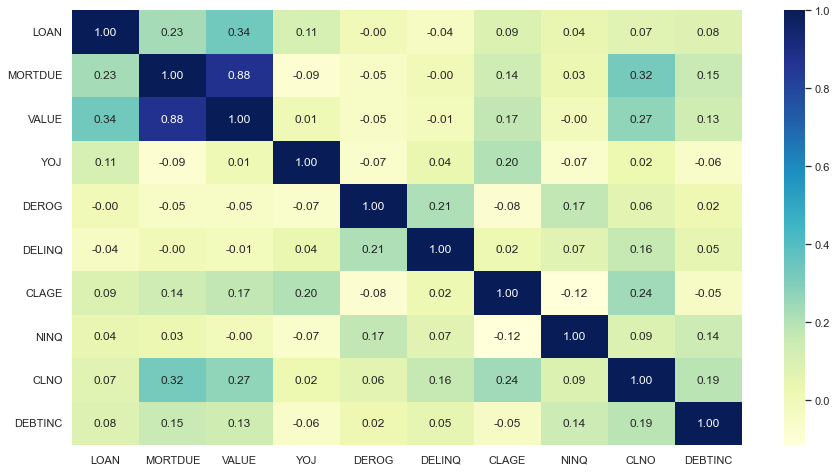

In [68]:
#Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations**

As noted before, from the results of the pairplot, we can see that the only high correlation among numerical 
variables is VALUE and MORTDUE. 

There appears to be also, a slight correlation between; LOAN and VALUE, LOAN and MORTDUE, MORTUDE and CLNO, 
VALUE and CLNO.

**Treating Outliers**

In [10]:
# I defined a function that it was easier for me to handle, and that is different from the one you put in the 
# Reference notebook. Basically it does the same (drops missing values and store the in a new data frame)

# First reate a copy of the data frame
df_raw = data.copy()

In [11]:
#Second, define the function to drop the outliers in the numerical variables
def drop_outliers(df, field_name):
    iqr = 1.5*(np.nanpercentile(df[field_name], 75) -  np.nanpercentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.nanpercentile(df[field_name], 75))].index, inplace = True)
    df.drop(df[df[field_name] < (np.nanpercentile(df[field_name], 25) - iqr)].index, inplace = True)

In [12]:
#Third, apply the function for each numerical variable in the data set
drop_outliers(df_raw, 'LOAN')
drop_outliers(df_raw, 'MORTDUE')
drop_outliers(df_raw, 'VALUE')
drop_outliers(df_raw, 'YOJ')
drop_outliers(df_raw, 'DEROG')
drop_outliers(df_raw, 'DELINQ')
drop_outliers(df_raw, 'CLAGE')
drop_outliers(df_raw, 'NINQ')
drop_outliers(df_raw, 'CLNO')
drop_outliers(df_raw, 'DEBTINC')

In [13]:
#Check that the variables have changed and have no outliers anymore
df_raw.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,"3,534.00","3,171.00","3,502.00","3,191.00","3,055.00","3,055.00","3,284.00","3,131.00","3,319.00","2,971.00"
mean,"16,469.50","66,104.82","91,259.94",8.46,0.00,0.00,173.49,0.92,19.48,33.43
std,"7,341.25","30,525.59","37,430.21",7.01,0.00,0.00,76.15,1.14,8.17,6.52
min,"1,100.00","2,063.00","8,000.00",0.00,0.00,0.00,11.70,0.00,0.00,14.37
25%,"10,800.00","45,461.50","64,400.25",3.00,0.00,0.00,111.74,0.00,14.00,29.05
50%,"15,700.00","63,363.00","86,699.50",7.00,0.00,0.00,167.41,1.00,19.00,34.43
75%,"21,500.00","84,837.50","113,600.00",12.00,0.00,0.00,227.31,2.00,25.00,38.60
max,"41,300.00","155,056.00","191,175.00",28.00,0.00,0.00,412.02,5.00,41.00,53.18


In [14]:
#Compare with the fbirst data set
data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,"5,960.00","5,442.00","5,848.00","5,445.00","5,252.00","5,380.00","5,652.00","5,450.00","5,738.00","4,693.00"
mean,"18,607.97","73,760.82","101,776.05",8.92,0.25,0.45,179.77,1.19,21.30,33.78
std,"11,207.48","44,457.61","57,385.78",7.57,0.85,1.13,85.81,1.73,10.14,8.60
min,"1,100.00","2,063.00","8,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.52
25%,"11,100.00","46,276.00","66,075.50",3.00,0.00,0.00,115.12,0.00,15.00,29.14
50%,"16,300.00","65,019.00","89,235.50",7.00,0.00,0.00,173.47,1.00,20.00,34.82
75%,"23,300.00","91,488.00","119,824.25",13.00,0.00,0.00,231.56,2.00,26.00,39.00
max,"89,900.00","399,550.00","855,909.00",41.00,10.00,15.00,"1,168.23",17.00,71.00,203.31


**Adding new columns in the dataset for each column which has missing values**

In [15]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [16]:
# list of columns that has missing values in it
missing_col = [col for col in df_raw.columns if df_raw[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df_raw,colmn)

In [18]:
#Check the addded columns to de data frame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 5696
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          3534 non-null   category
 1   LOAN                         3534 non-null   int64   
 2   MORTDUE                      3171 non-null   float64 
 3   VALUE                        3502 non-null   float64 
 4   REASON                       3362 non-null   category
 5   JOB                          3316 non-null   category
 6   YOJ                          3191 non-null   float64 
 7   DEROG                        3055 non-null   float64 
 8   DELINQ                       3055 non-null   float64 
 9   CLAGE                        3284 non-null   float64 
 10  NINQ                         3131 non-null   float64 
 11  CLNO                         3319 non-null   float64 
 12  DEBTINC                      2971 non-null   float64 
 13  MOR

**Observations**

We can see that duplicates of all the variables were generated of a boolean type, in which True,
indicates the presence of a missing value, and False, the abscence of it.

**Filling missing values in numerical columns with median and mode in categorical variables**

In [19]:
#First: select numeric columns
num_data = df_raw.select_dtypes('number')

In [20]:
#Second: impute the missing values with median
df_raw[num_data.columns] = num_data.fillna(num_data.median())

In [22]:
#For the categorical variables, I followed a different aproach:
#I created a set of new variables from category to numbers, and the imputed the missing values with the mode. 

#First: create a new variable for (JOB) from categories (strings) to numbers 
df_raw['job_new'] = df_raw['JOB'].cat.rename_categories([1, 2, 3, 4, 5, 6])

In [23]:
#Second: take the mode of this new variable
df_raw['job_new'].mode()

0    3
Name: job_new, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [24]:
#Third: fill the missing values, with the above mode value
df_raw['job_new'] = df_raw['job_new'].fillna(value = 3)

In [26]:
#I repeated this same steps, for the other categorical variable (REASON)

df_raw['reason_new'] = df_raw['REASON'].cat.rename_categories([1, 2])
df_raw['reason_new'].mode()

0    1
Name: reason_new, dtype: category
Categories (2, int64): [1, 2]

In [27]:
df_raw['reason_new'] = df_raw['reason_new'].fillna(value = 1)

In [28]:
#Check the new data frame, without any missing values:
df_raw.isnull().sum()

BAD                              0
LOAN                             0
MORTDUE                          0
VALUE                            0
REASON                         172
JOB                            218
YOJ                              0
DEROG                            0
DELINQ                           0
CLAGE                            0
NINQ                             0
CLNO                             0
DEBTINC                          0
MORTDUE_missing_values_flag      0
VALUE_missing_values_flag        0
REASON_missing_values_flag       0
JOB_missing_values_flag          0
YOJ_missing_values_flag          0
DEROG_missing_values_flag        0
DELINQ_missing_values_flag       0
CLAGE_missing_values_flag        0
NINQ_missing_values_flag         0
CLNO_missing_values_flag         0
DEBTINC_missing_values_flag      0
job_new                          0
reason_new                       0
dtype: int64

**Observations**

With this transformations, now we have a new data set that contains, no missing values.
For further modelling, I will drop the varibles (Reason, and Job) that were not transformed, and also the 
variables with the missing values flag, although I would run some models before, with them to see their contribution
and relevance to the predictions, and also the intepretability of their results.